# Week 3

I hope you're getting the hang of things. Today we're going on with the prinicples of data visualization!

## Overview

Once again, the lecture has three parts:

* First you will watch a video on visualization and solve a couple of exercises.
* After that, we'll be reading about *scientific data visualization*, and the huge number of things you can do with just one variable. Naturally, we'll be answering questions about that book. 
* And finally reproducing some of the plots from that book.

## Part 1: Fundamentals of data visualization

Last week we had a small introduction of data visualization. Today, we are going to be a bit more specific on data analysis and visualization. Digging a bit more into the theory with the next video.

<mark>*It's important to highlight that these lectures are quite important. We don't have a formal book on data visualization. So the only source of knowledge about the **principles**, **theories**, and **ideas**, that are the foundation for good data viz, comes from the videos*. So watch them 🤓 </mark>

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/yiU56codNlI/0.jpg)](https://www.youtube.com/watch?v=yiU56codNlI)

> *Excercise 1.1:* Questions for the lecture
> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?


The Pearson correlation indicates the linear relationship between two variables X and Y. <br>
Mathematical formulation: $r = \frac{\sum((x-\bar{x})(y-\bar{y}))}{\sqrt(\sum(x-\bar{x})^{2}\sum(y-\bar{y})^{2})}$

> * What is the difference between a bar-chart and a histogram?


Bar chart only display and compare categorical variables whereas histograms are used to visualiza quantative data by showing distribution of variables.

> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

Dependent on the size of the dataset. <br>
Freedman-Diaconis rule -> $bin \, width = \frac{2(q3-q1)}{\sqrt[3]{n}}$ <br>
$bins = ceil(\frac{max(x)-min(x)}{bin width})$ 

In [1]:
!pip install seaborn --upgrade

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


You should consider upgrading via the 'c:\users\hanlu\anaconda3\python.exe -m pip install --upgrade pip' command.


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Ok, now that we've talked a bit about correlation and distributions, we are going to compute/visualize them while also testing some hypotheses along the way. Until now, we have analysed data at an explorative level, but we can use statistics to verify whether relationships between variables are significant. We'll do this in the following exercise.

> *Exercise 1.2:* Hypothesis testing. We will look into correlations between number of steps and BMI, and differences between two data samples (Females vs Males). Follow the steps below for success:
>
> * First, we need to get some data. Download and read the data from the Female group [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv) and the one from the Male group [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv).


In [3]:
from urllib.request import urlopen
import csv

urls = ['https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv','https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv']
data= []
for url in urls:
    datafile = pd.read_csv(url,sep=",") # use sep="," for coma separation. 
    data.append(datafile)

In [8]:
female = data[0]
male = data[1]

> * Next, we are going to verify the following hypotheses:
>    1. <mark>*H1: there is a statistically significant difference in the average number of steps taken by men and women*</mark>. Is there a statistically significant difference between the two groups? What is the difference between their mean number of steps? Plot two histograms to visualize the step-count distributions, and use the criterion you chose in Ex.1.1 to define the right bin-size.  
     **Hint** you can use the function `ttest_ind()` from the `stats` package to test the hypothesis and consider a significance level $\alpha=0.05$.

In [9]:
stats.ttest_ind(data[0].steps, data[1].steps)

Ttest_indResult(statistic=-5.539053975609961, pvalue=3.498915026461386e-08)

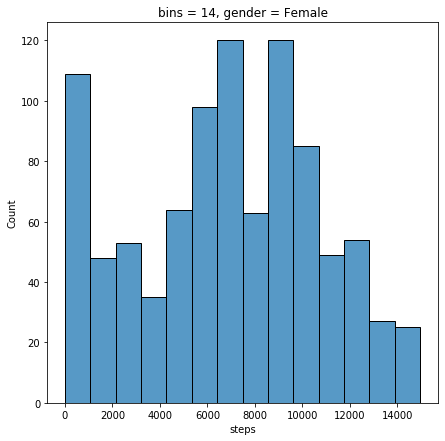

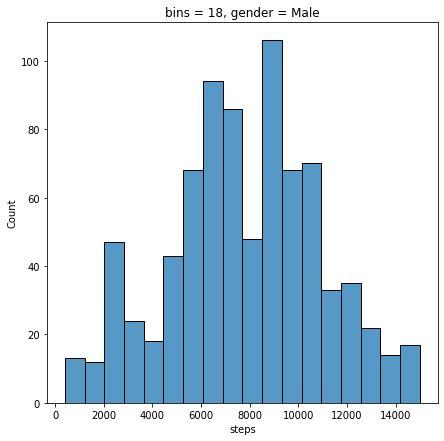

In [13]:
import pandas as pd
genders = ['Female','Male']
for i in range(len(data)):
    norm_dist = data[i].steps
    q1 = norm_dist.quantile(0.25)
    q3 = norm_dist.quantile(0.75)
    iqr = q3 - q1
    bin_width = (2 * iqr) / (len(norm_dist) ** (1 / 3))
    bin_count = int(np.ceil((norm_dist.max() - norm_dist.min()) / bin_width))
    fig = plt.figure(figsize=(7,7))
    sns.histplot(x=norm_dist,bins=bin_count)
    plt.title(f'bins = {bin_count}, gender = {genders[i]}')

>    2. <mark>*H2: there is a negative correlation between the number of steps and the BMI for women*.</mark> We will use Pearson's correlation here. Is there a negative correlation? How big is it?


In [14]:
stats.pearsonr(female.steps, female.bmi)

(-0.3558514620041997, 9.704490533930592e-30)

There is a negative correlation as indicated by the extremely small p value 

>    3. <mark>*H3: there is a positive correlation between the number of steps and the BMI for men*.</mark> Is there a positive correlation? Compare it with the one you found for women.


In [15]:
stats.pearsonr(male.steps, male.bmi)

(-0.1600704979175654, 4.2082103181889605e-06)

Again there is a negative correlation supported by p val < 0.05 but the strength is much smaller than that for females

> * We have now gathered the results. Can you find a possible explanation for what you observed? You don't need to come up with a grand theory about mobility and gender, just try to find something (e.g. theory, news, papers, further analysis etc.) to support your conclusions and write down a couple of sentences. 



> *Exercise 1.3:* scatter plots. We're now going to fully visualize the data from the previous exercise.
>
> * Create a scatter plot with both data samples. Use `color='#f6756d'` for one <font color=#f6756d>sample</font> and `color='#10bdc3'` for the other <font color=#10bdc3>sample</font>. The data is in front of you, what do you observe? Take a minute to think about these exercises: what do you think the point is? 
    * After answering the questions above, have a look at this [paper](https://genomebiology.biomedcentral.com/track/pdf/10.1186/s13059-020-02133-w.pdf) (in particular, read the *Not all who wander are lost* section).


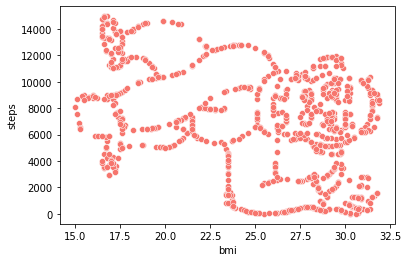

In [104]:
sns.scatterplot(data=female, x="bmi", y="steps",color = '#f6756d')

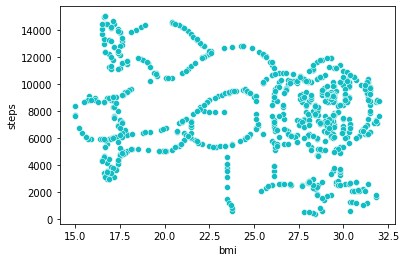

In [105]:
sns.scatterplot(data=male, x="bmi", y="steps",color = '#10bdc3')

> * The scatter plot made me think of another point we often overlook: *color-vision impairments*. When visualizing and explaining data, we need to think about our audience:
>    * We used the same colors as in the paper, try to save the figure and use any color-blindness simulator you find on the web ([this](https://www.color-blindness.com/coblis-color-blindness-simulator/) was the first that came out in my browser). Are the colors used problematic? Explain why, and try different types of colors. If you are interested in knowing more you can read this [paper](https://www.tandfonline.com/doi/pdf/10.1179/000870403235002042?casa_token=MAYp78HctgQAAAAA:AZKSHJWuNmoMXD5Dtqln1Sc-xjNwCe6UVDMVEpP95UjTH3O1H-NKRkfYljw2VLSm_zKlN74Da6g).
>    * But, are colors the only option we have? Find an alternative to colors, explain it, and change your scatter plot accordingly.

## Part 2: Reading about the theory of visualization

Since we can go deeper with the visualization this year, we are going to read the first couple of chapters from [*Data Analysis with Open Source Tools*](http://shop.oreilly.com/product/9780596802363.do) (DAOST). It's pretty old, but I think it's a fantastic resource and one that is pretty much as relevant now as it was back then. The author is a physicist (like Sune) so he likes the way he thinks. And the books takes the reader all the way from visualization, through modeling to computational mining. Anywho - it's a great book and well worth reading in its entirety. 

As part of this class we'll be reading the first chapters. Today, we'll read chaper 2 (the first 28 pages) which supports and deepens many of the points we made during the video above. 

To find the text, you will need to go to **DTU Learn**. It's under "Course content" $\rightarrow$ "Content" $\rightarrow$ "Lecture 3 reading".

> *Excercise 2*: Questions for DAOST
> * Explain in your own words the point of the jitter plot.


Jitter plot can visualise spread and clustering of datapoints on one dimentional horizontal lines, while addressing the problem of overlapping of points of identical values by adjusting small random amount from their original positions in the vertical direction.

> * Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words).


It shows the choice of anchoring points, whether centering the bins on whole numbers of or not can produce drastically different picture of data distribution.

> * The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't. Sune didn't give a detailed explanation in the video, but now that works to our advantage. We'll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading? 


KDEs can be misleading due to the difficulty of choosing the optimal bandwidth as too narrow of bandwidth means failure to generalize to overall pattern and too wide of bandwidth means loss of detailed information. Thus there is the challenge of balancing faithfulness of representation against the simplicity of behaviour, also known as the "bias-variance trade-off". 

> * Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?


CDFs are less intuitive due to their cumulative nature, meaning that observations/interpretations cannot be made by reading off individual values from the plots as they are dependent on previous values. The informaiton we extract from the plots are incremental. 

> * What is a *Quantile plot*? What is it good for. 


Quantile plots are CDF plots with inverted x and y axis. It is more comprehensive when we want to quickly read off for what values of x is at a particular percentile value of y.

> * How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before?


Probability plot is defined to be a graphical technique for assessing whether or not a dataset foollows a given distribution. The data are plotted against a theoretical distribution in such a wat that the points should form approximately a straight line. 

> * One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 


Mean, median and related summary statistics are reliable only when the data distribution is symmetric with no or very few outliers, as they can easily be misleading with influential outliers. 

> * Sune loves box plots (but not enough to own one of [these](https://twitter.com/statisticiann/status/1387454947143426049) 😂). When are box plots most useful?


Boxplots are useful in giving a general overview of the distribution of all datapoints, including the amount of outliers and at which values they concentrate at. It is also useful in comparing the range of data distributions with each other.

> * The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?

On top of showing the distribution of all datapoints, violin plots also present the probability density information, which is particularly useful when there are multiple peaks.

## Part 3: *Finally*! Let's create some visualizations

> *Excercise 3.1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.


In [188]:
df_crime = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df_crime['Date'] = pd.to_datetime(df_crime['Date'])
df_crime['Hour'] = pd.DatetimeIndex(df_crime['Time']).hour
df_crime['Day'] = pd.DatetimeIndex(df_crime['Date']).day

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69],
 <a list of 70 Text xticklabel objects>)

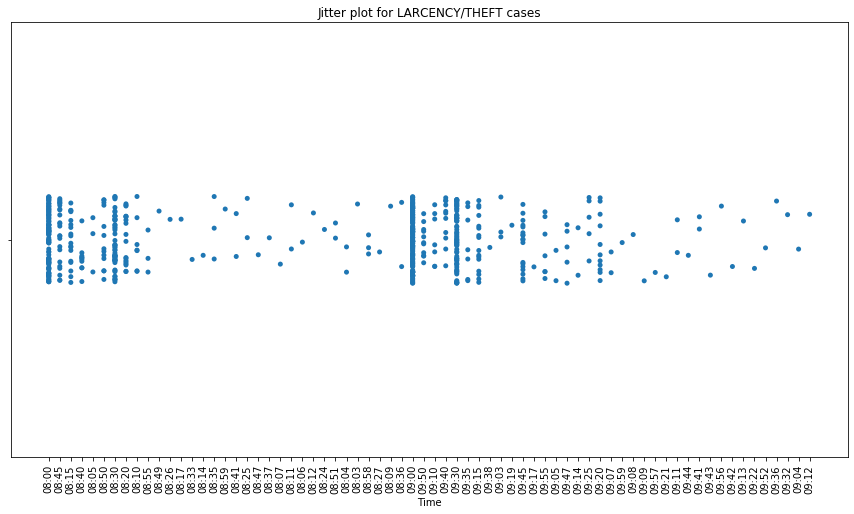

In [189]:
crime = 'LARCENY/THEFT'
df_theft = df_crime[df_crime['Category']==crime].sort_values(by=['Date'])
mask = (df_theft['Date'] >= '12/01/2017') & (df_theft['Date'] <= '03/01/2018')
df_jitter = df_theft[mask].sort_values(by=['Hour'])
df_jitter_hour = df_jitter[(df_jitter['Hour'] >= 8) & (df_jitter['Hour'] <= 9)]
plt.figure(figsize=(15,8))
ax = sns.stripplot(x=df_jitter_hour['Time'],jitter=0.1).set_title('Jitter plot for LARCENCY/THEFT cases')
plt.xticks(rotation = 90, fontsize = 10)

> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 


In [225]:
df_ass_veh = df_crime[df_crime.Category.isin(['ASSAULT', 'VEHICLE THEFT'])].sort_values(by='Date')
mask = (df_ass_veh['Date'] > '01/01/2015') & (df_ass_veh['Date'] <= '11/01/2015')
temp = df_ass_veh[mask]

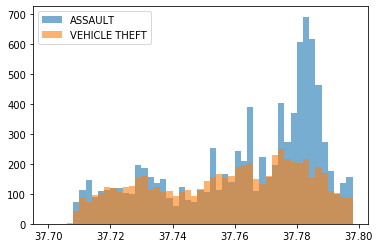

In [228]:
bin_edges_pros = pd.np.histogram(temp[temp.Category == 'ASSAULT'].Y, bins = 50)[1]
bin_edges_tres = pd.np.histogram(temp[temp.Category == 'VEHICLE THEFT'].Y, bins = 50)[1]
ax = plt.hist(temp[temp.Category == 'ASSAULT'].Y, bins = pd.np.arange(37.7, 37.8, 0.002), alpha = 0.6);
ax = plt.hist(temp[temp.Category == 'VEHICLE THEFT'].Y, bins = pd.np.arange(37.7, 37.8, 0.002), alpha = 0.6);
plt.legend(labels = ['ASSAULT', 'VEHICLE THEFT'])

> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).


(0, 24)

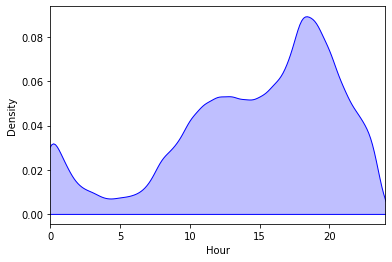

In [238]:
sns.kdeplot(df_jitter['Hour'],bw=0.1,shade=True,color='b')
plt.xlim(0, 24)

> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 


(0, 24)

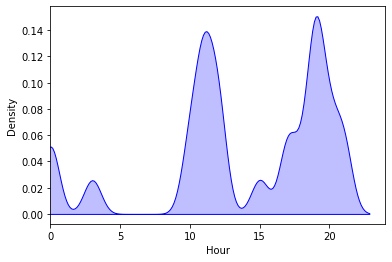

In [239]:
df_random_samples = df_jitter.sample(25)
sns.kdeplot(df_random_samples['Hour'],bw=0.1,shade=True,color='b')
plt.xlim(0, 24)


> *Exercise 3.2*. Ok. Now for more plots 😊
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
     **Hint:** Take a look at the `scipy.stats.probplot` function. 


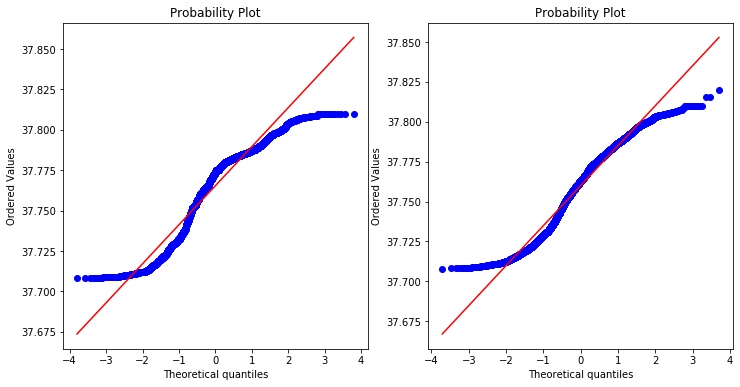

In [242]:
plt.figure(figsize = [12, 6])

plt.subplot(121)
res = stats.probplot(temp[temp.Category == 'ASSAULT'].Y, plot = plt)

plt.subplot(122)
res = stats.probplot(temp[temp.Category == 'VEHICLE THEFT'].Y, plot = plt)


> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.


In [253]:
focuscrimes = list(set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']))
df_focus = df_crime[df_crime.Category.isin(focuscrimes)]
df_focus_box = df_focus.groupby(['Category','Date']).count().reset_index().rename(columns = {'PdId':'No. crimes per day'})

>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

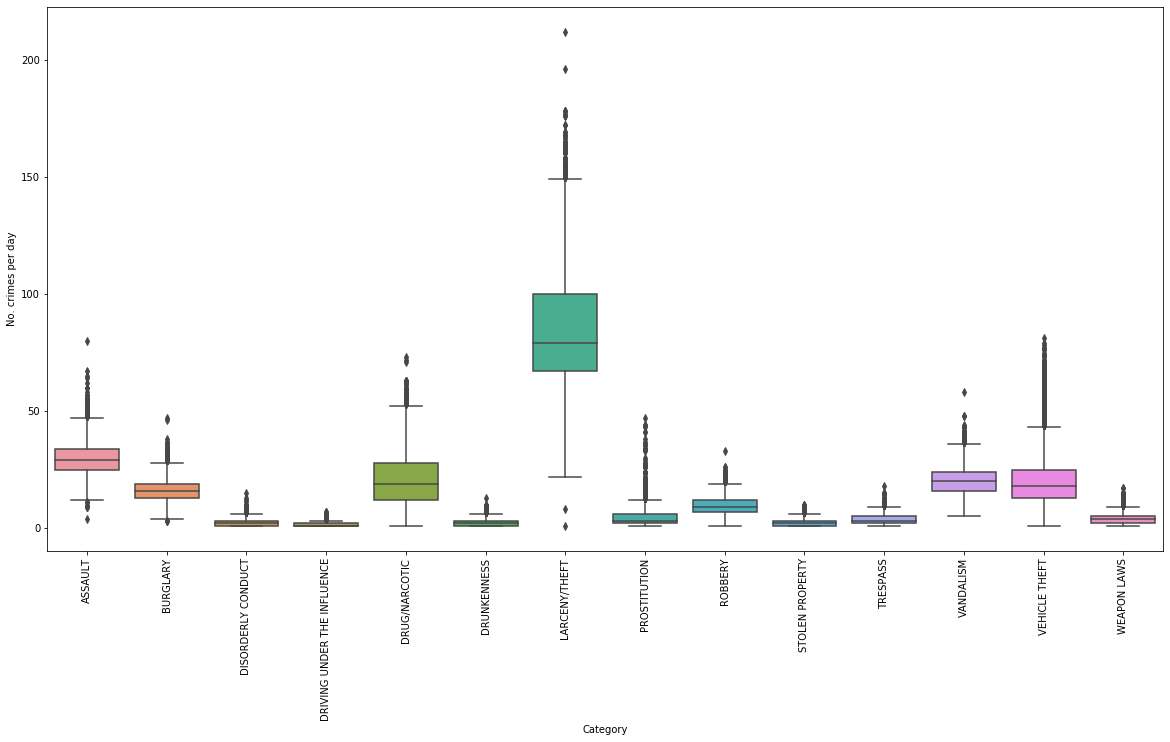

In [256]:
plt.figure(figsize = [20, 10])
ax = sns.boxplot(x="Category", y="No. crimes per day", data=df_focus_box)
plt.xticks(rotation = 90, fontsize = 10)

>   * What does this plot reveal that you can't see in the plots from last time?


> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
    * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
    * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
      * For each time-of-day, simply encode it as seconds since midnight.
      * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
    * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

In [273]:
df_focus['Time2'] = df_focus['Time'].str.split(":").apply(lambda x: int(x[0])+ int(x[1])/60)
df_focus['Seconds'] = df_focus['Time'].str.split(":").apply(lambda x: int(x[0]) * 3600 + int(x[1]) * 60)
df_focus_time = df_focus.groupby(['Category','Seconds']).count().reset_index().rename(columns = {'PdId':'Time of arrests'})

In [274]:
df_focus_time

,Category,Seconds,Time of arrests,IncidntNum,Incident Code,Descript,DayOfWeek,Date,Time,PdDistrict,...,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Hour,Day,Time2
0,ASSAULT,60,2871,2871,2871,2871,2871,2871,2871,2871,...,597,2870,438,438,665,98,2867,2871,2871,2871
1,ASSAULT,120,62,62,62,62,62,62,62,62,...,19,62,9,9,17,2,62,62,62,62
2,ASSAULT,180,78,78,78,78,78,78,78,78,...,17,77,11,11,12,2,77,78,78,78
3,ASSAULT,240,46,46,46,46,46,46,46,46,...,11,46,5,5,10,2,46,46,46,46
4,ASSAULT,300,329,329,329,329,329,329,329,329,...,101,329,54,54,91,10,327,329,329,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,WEAPON LAWS,86100,30,30,30,30,30,30,30,30,...,6,30,5,5,9,0,30,30,30,30
19157,WEAPON LAWS,86160,11,11,11,11,11,11,11,11,...,4,11,4,4,3,2,11,11,11,11
19158,WEAPON LAWS,86220,11,11,11,11,11,11,11,11,...,5,11,5,5,3,1,11,11,11,11
19159,WEAPON LAWS,86280,7,7,7,7,7,7,7,7,...,4,7,2,2,2,1,7,7,7,7


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

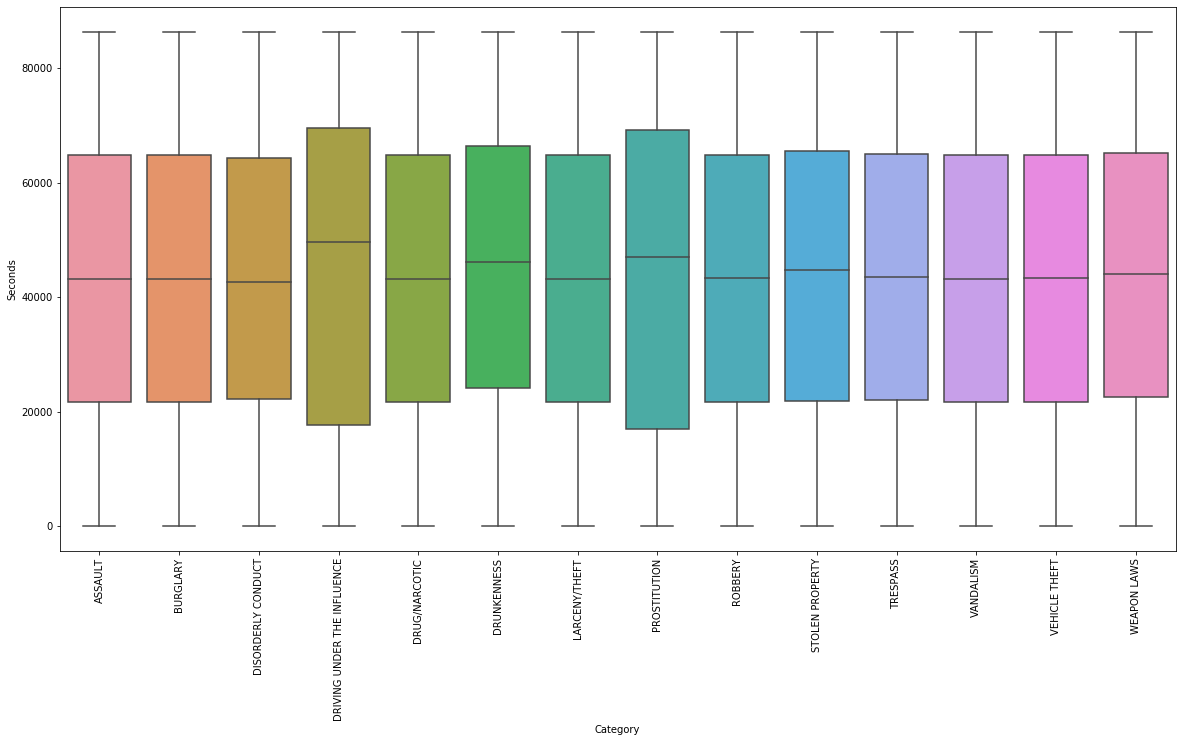

In [276]:
plt.figure(figsize = [20, 10])
ax = sns.boxplot(x="Category", y="Seconds", data=df_focus_time)
plt.xticks(rotation = 90, fontsize = 10)